In [2]:
import os
import pycocotools
from pycocotools import mask
import pycocotools.mask as mask_util
import numpy as np
import json
from pycocotools.coco import COCO
from sklearn.model_selection import train_test_split
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib as mpl

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

In [3]:
os.getcwd()

'/Users/zekiyan/Library/CloudStorage/GoogleDrive-zettayan@gmail.com/My Drive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation/notebooks'

In [4]:
os.chdir('../')

In [5]:
os.getcwd()

'/Users/zekiyan/Library/CloudStorage/GoogleDrive-zettayan@gmail.com/My Drive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation'

In [6]:
from src.data import SegmentationDataset

In [7]:
sd = SegmentationDataset(dataset_dir='datasets/train', 
                         csv_file_path='datasets/train.csv')

In [8]:
sd.processed_df.head()

,id,class,segmentation,case,day,slice,file_path,file_name,composite_id,image_height,image_width,resolution
0,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,123,20,0065,datasets/train/case123/case123_day20/scans/sli...,slice_0065_266_266_1.50_1.50.png,123_20_slice_0065_266_266_1.50_1.50.png,266,266,266x266
1,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...,123,20,0066,datasets/train/case123/case123_day20/scans/sli...,slice_0066_266_266_1.50_1.50.png,123_20_slice_0066_266_266_1.50_1.50.png,266,266,266x266
2,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...,123,20,0067,datasets/train/case123/case123_day20/scans/sli...,slice_0067_266_266_1.50_1.50.png,123_20_slice_0067_266_266_1.50_1.50.png,266,266,266x266
3,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...,123,20,0068,datasets/train/case123/case123_day20/scans/sli...,slice_0068_266_266_1.50_1.50.png,123_20_slice_0068_266_266_1.50_1.50.png,266,266,266x266
4,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...,123,20,0069,datasets/train/case123/case123_day20/scans/sli...,slice_0069_266_266_1.50_1.50.png,123_20_slice_0069_266_266_1.50_1.50.png,266,266,266x266


In [9]:
df = sd.processed_df

In [10]:
random.seed(42)

# train - 65, val - 15, test - 20 

train_df, temp_df = train_test_split(df, test_size=0.35, random_state=42)
# Split the temporary dataset into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5714, random_state=42)  # test_size ~ 57.14% of 35%


train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [11]:
train_df['class'].value_counts(normalize=True)

class
large_bowel    0.412603
small_bowel    0.330354
stomach        0.257043
Name: proportion, dtype: float64

In [12]:
val_df['class'].value_counts(normalize=True)

class
large_bowel    0.415176
small_bowel    0.330057
stomach        0.254767
Name: proportion, dtype: float64

In [13]:
test_df['class'].value_counts(normalize=True)

class
large_bowel    0.424296
small_bowel    0.330237
stomach        0.245467
Name: proportion, dtype: float64

### Testing the code for temporary dataframe with 20 samples

In [14]:
temp_df = train_df.sample(20)
temp_df = temp_df.reset_index(drop=True)

In [15]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
categories = sd.create_coco_categories(CLASSES)
categories

[{'id': 0, 'name': 'small_bowel'},
 {'id': 1, 'name': 'large_bowel'},
 {'id': 2, 'name': 'stomach'}]

In [16]:
temp_images = sd.create_coco_images(temp_df)
temp_images[0]

Processing images: 100%|██████████| 20/20 [00:00<00:00, 85163.53it/s]


{'id': 1,
 'file_name': 'case54/case54_day30/scans/slice_0055_266_266_1.50_1.50.png',
 'width': 266,
 'height': 266}

In [17]:
temp_annotations = sd.create_annotations(temp_df, temp_images)
temp_annotations[0]

Generating annotations: 100%|██████████| 20/20 [00:00<00:00, 133.54it/s]


{'segmentation': {'counts': [54665,
   10,
   254,
   14,
   250,
   17,
   248,
   19,
   246,
   21,
   244,
   22,
   244,
   23,
   243,
   23,
   243,
   23,
   243,
   23,
   243,
   23,
   243,
   23,
   244,
   22,
   244,
   22,
   245,
   20,
   248,
   17,
   250,
   15,
   253,
   12,
   255,
   9,
   260,
   3,
   11030],
  'size': [266, 266]},
 'bbox': [205, 128, 20, 23],
 'area': 92055,
 'image_id': 1,
 'category_id': 1,
 'iscrowd': 0,
 'id': 0}

In [18]:
len(temp_annotations)

46

In [19]:
temp_json = {
    'categories': categories,
    'images': temp_images,
    'annotations': temp_annotations
}

with open('temp_json.json', 'w', encoding='utf-8') as f:
    json.dump(temp_json, f, ensure_ascii=True, indent=4, default=np_encoder)

In [20]:
from pathlib import Path
annFile = Path(f'temp_json.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [21]:
temp_images

[{'id': 1,
  'file_name': 'case54/case54_day30/scans/slice_0055_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 2,
  'file_name': 'case84/case84_day23/scans/slice_0088_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 3,
  'file_name': 'case58/case58_day0/scans/slice_0085_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 4,
  'file_name': 'case18/case18_day21/scans/slice_0093_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 5,
  'file_name': 'case149/case149_day0/scans/slice_0071_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 6,
  'file_name': 'case141/case141_day27/scans/slice_0045_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 7,
  'file_name': 'case43/case43_day20/scans/slice_0110_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 8,
  'file_name': 'case146/case146_day0/scans/slice_0067_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 9,
  'file_na

In [22]:
imgIds[5:7]

[6, 7]

In [23]:
imgs = coco.loadImgs(imgIds[5:7])
imgs

[{'id': 6,
  'file_name': 'case141/case141_day27/scans/slice_0045_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 7,
  'file_name': 'case43/case43_day20/scans/slice_0110_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266}]

In [24]:
imgs[0]

{'id': 6,
 'file_name': 'case141/case141_day27/scans/slice_0045_266_266_1.50_1.50.png',
 'width': 266,
 'height': 266}

In [25]:
annIds = coco.getAnnIds(imgIds=[imgs[1]['id']])
annIds

[11, 12, 13]

In [26]:
anns = coco.loadAnns(annIds[0])
anns

[{'segmentation': {'counts': [48838,
    4,
    260,
    7,
    259,
    8,
    257,
    10,
    256,
    11,
    255,
    11,
    255,
    12,
    254,
    12,
    254,
    13,
    254,
    12,
    254,
    12,
    254,
    12,
    254,
    12,
    255,
    11,
    255,
    10,
    257,
    9,
    258,
    6,
    17655],
   'size': [266, 266]},
  'bbox': [183, 157, 17, 13],
  'area': 43860,
  'image_id': 7,
  'category_id': 1,
  'iscrowd': 0,
  'id': 11}]

In [27]:
!pwd

/Users/zekiyan/Library/CloudStorage/GoogleDrive-zettayan@gmail.com/My Drive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation


In [28]:
dataset_dir = 'datasets/train'

[6, 7]
6
[10]
7
[11, 12, 13]


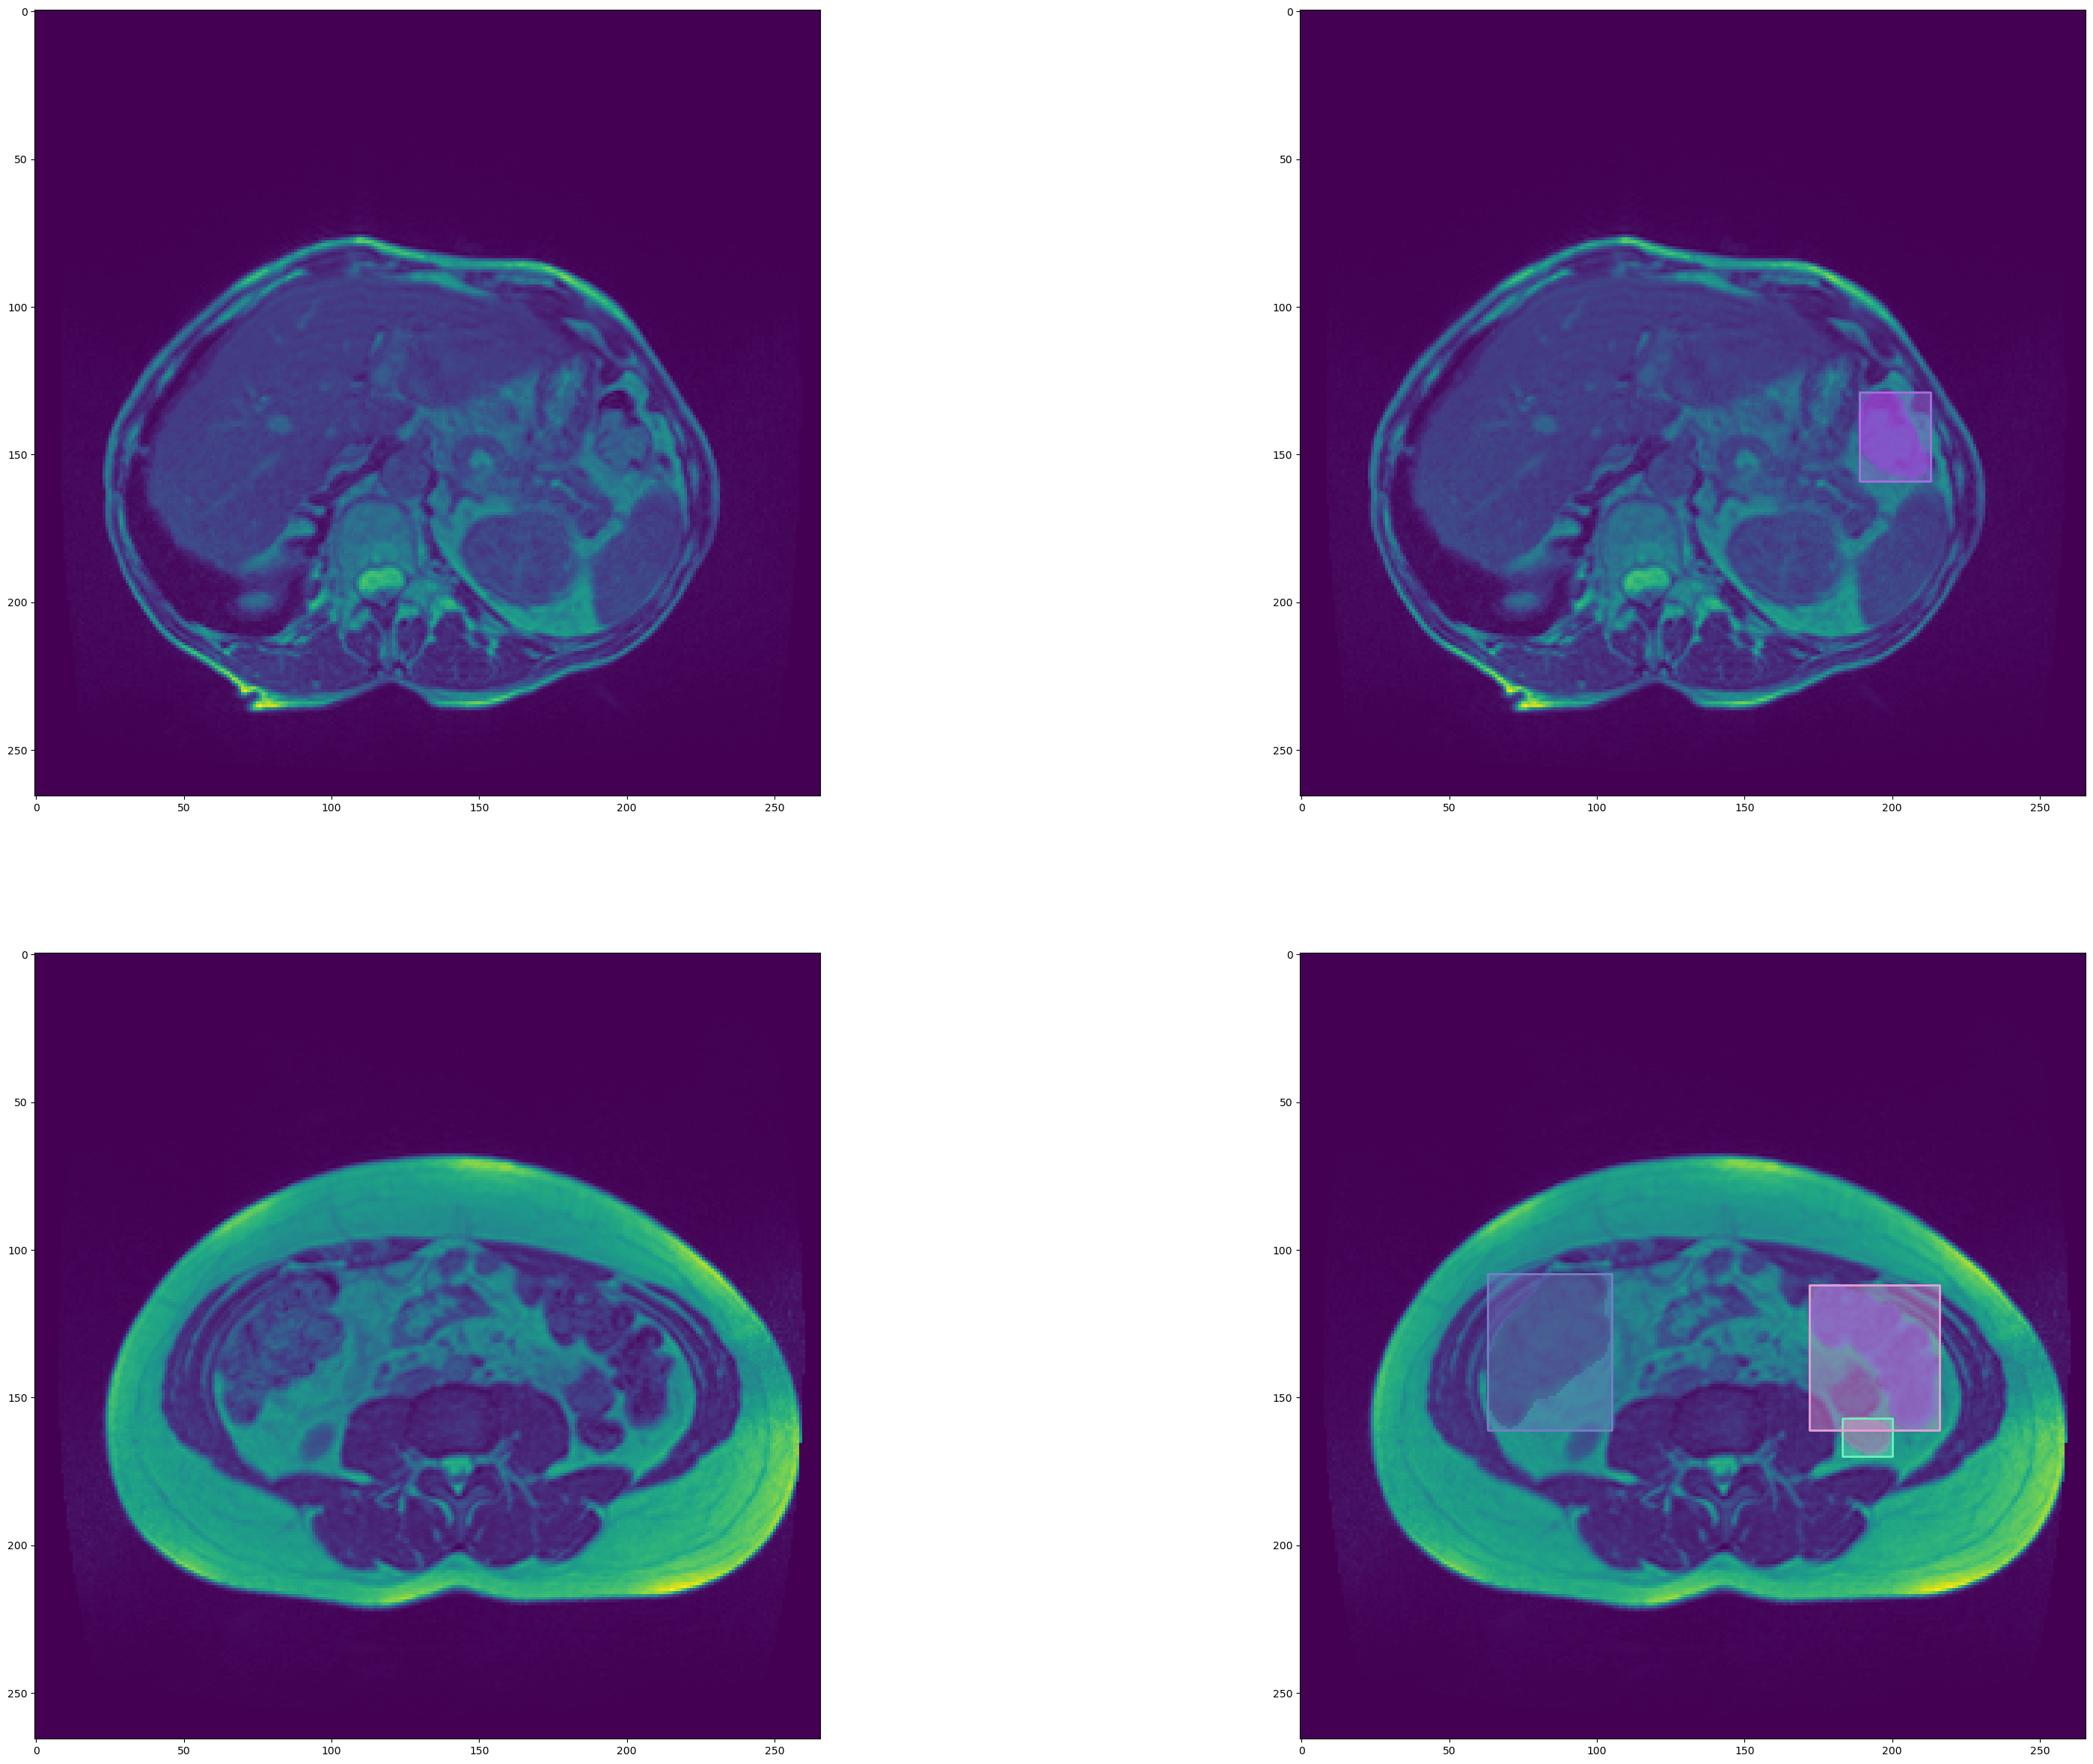

In [29]:
from matplotlib import pyplot as plt
from PIL import Image
imgs = coco.loadImgs(imgIds[5:7])
print(imgIds[5:7])
_, axs = plt.subplots(len(imgs), 2, figsize=(40, 15 * len(imgs)))
for img, ax in zip(imgs, axs):
    print(img['id'])
    I = Image.fromarray(
        np.array(Image.open(os.path.join(dataset_dir, img['file_name']))).astype("uint16"))
    annIds = coco.getAnnIds(imgIds=[img['id']])
    print(annIds)
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

In [30]:
from src.data import DataGenerator

In [31]:
temp_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='temp_json.json',
                                     shuffle=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [32]:
X, y = temp_generator_class.__getitem__(1)

In [33]:
X.shape, y.shape

((128, 128, 3), (128, 128, 3))

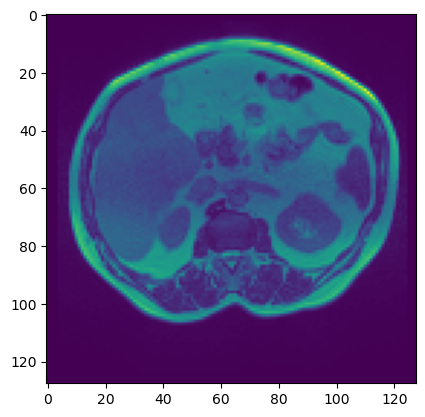

In [34]:
plt.imshow(X[:,:,1])
plt.show()

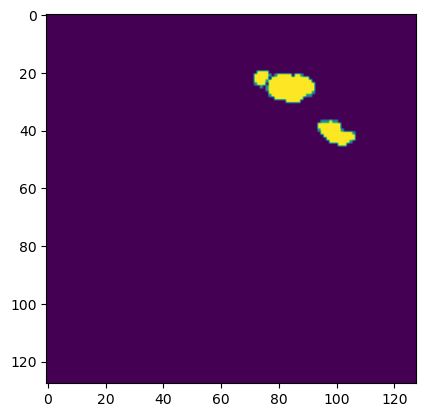

In [35]:
plt.imshow(y[:,:,1])
plt.show()

In [36]:
(y[:,:,1] == 2).sum()

212

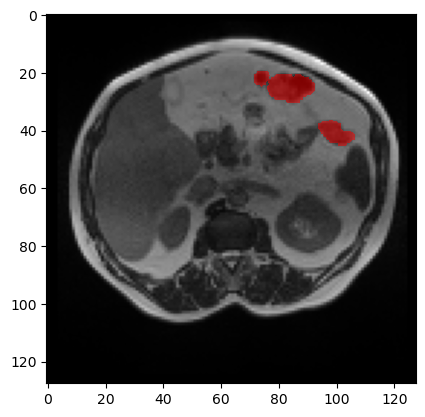

In [37]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X)[:,:,1], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [38]:
from torch.utils.data import DataLoader

temp_loader = DataLoader(temp_generator_class, batch_size=32, num_workers=0)

In [39]:
print("Batch size:", temp_loader.batch_size)
print("Num workers:", temp_loader.num_workers)
print("Dataset size:", len(temp_loader.dataset))
print("Number of batches:", len(temp_loader))

Batch size: 32
Num workers: 0
Dataset size: 20
Number of batches: 1


In [41]:
# for images, labels in temp_loader:
#     # Execute your training or evaluation process
#     print(images)
#     pass

### Testing successful, proceeding to a train and test dataframes

In [42]:
os.getcwd()

'/Users/zekiyan/Library/CloudStorage/GoogleDrive-zettayan@gmail.com/My Drive/Desktop/4. Spring Course/1. Advances in Computer Vision/7. Project/gi-tract-image-segmentation'

In [ ]:
# !mkdir datasets/coco

In [46]:
# CLASSES = ['small_bowel', 'large_bowel', 'stomach']
# categories = sd.create_coco_categories(CLASSES)
# train_images = sd.create_coco_images(train_df)
# train_annotations = sd.create_annotations(train_df, train_images)

# train_json = {
#     'categories': categories,
#     'images': train_images,
#     'annotations': train_annotations
# }

# with open('datasets/coco/train_json.json', 'w', encoding='utf-8') as f:
#     json.dump(train_json, f, ensure_ascii=True, indent=4, default=np_encoder)
    
# print(train_annotations[0])

Generating annotations: 100%|██████████| 14269/14269 [02:35<00:00, 91.95it/s] 


{'segmentation': {'counts': [50081, 10, 298, 14, 295, 16, 294, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 293, 17, 294, 16, 294, 15, 296, 14, 296, 13, 298, 11, 301, 7, 56240], 'size': [310, 360]}, 'bbox': [161, 168, 18, 17], 'area': 68595, 'image_id': 1, 'category_id': 2, 'iscrowd': 0, 'id': 0}


In [47]:
# CLASSES = ['small_bowel', 'large_bowel', 'stomach']
# categories = sd.create_coco_categories(CLASSES)
# val_images = sd.create_coco_images(val_df)
# val_annotations = sd.create_annotations(val_df, val_images)

# val_json = {
#     'categories': categories,
#     'images': val_images,
#     'annotations': val_annotations
# }

# with open('datasets/coco/val_json.json', 'w', encoding='utf-8') as f:
#     json.dump(val_json, f, ensure_ascii=True, indent=4, default=np_encoder)
    
# print(val_annotations[0])

Generating annotations: 100%|██████████| 4620/4620 [00:35<00:00, 131.09it/s]


{'segmentation': {'counts': [55168, 1, 1, 1, 261, 7, 258, 9, 256, 13, 253, 16, 250, 17, 250, 18, 249, 19, 248, 19, 250, 18, 249, 18, 250, 17, 250, 19, 248, 20, 247, 20, 247, 21, 247, 22, 245, 23, 243, 24, 243, 23, 245, 21, 246, 20, 248, 18, 249, 17, 252, 13, 254, 11, 8904], 'size': [266, 266]}, 'bbox': [207, 102, 26, 40], 'area': 113475, 'image_id': 1, 'category_id': 1, 'iscrowd': 0, 'id': 0}


In [48]:
# test_images = sd.create_coco_images(test_df)
# test_annotations = sd.create_annotations(test_df, test_images)
# test_json = {
#     'categories': categories,
#     'images': test_images,
#     'annotations': test_annotations
# }

# with open('datasets/coco/test_json.json', 'w', encoding='utf-8') as f:
#     json.dump(test_json, f, ensure_ascii=True, indent=4, default=np_encoder)

# print(test_annotations[0])

Generating annotations: 100%|██████████| 5984/5984 [00:47<00:00, 125.66it/s]


{'segmentation': {'counts': [41893, 4, 261, 6, 259, 8, 257, 8, 258, 8, 258, 7, 259, 6, 260, 6, 260, 5, 262, 4, 262, 3, 26202], 'size': [266, 266]}, 'bbox': [157, 128, 11, 9], 'area': 16575, 'image_id': 1, 'category_id': 0, 'iscrowd': 0, 'id': 0}


In [49]:
train_df.shape, val_df.shape, test_df.shape

((22043, 12), (5087, 12), (6783, 12))

In [50]:
from src.data import DataGenerator

In [51]:
train_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/train_json.json',
                                     shuffle=True)

val_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/val_json.json',
                                     shuffle=True)

test_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="test",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/test_json.json',
                                     shuffle=False)

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


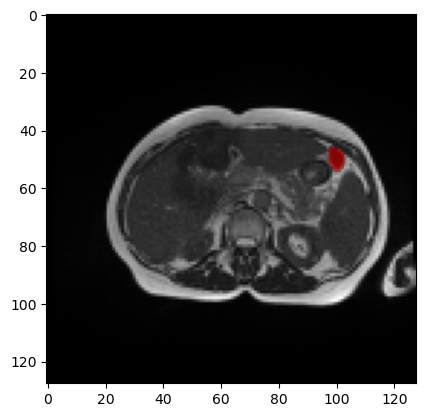

In [52]:
from matplotlib.colors import ListedColormap

X, y = train_generator_class.__getitem__(9)

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [53]:
train_loader = DataLoader(train_generator_class, batch_size=32, num_workers=0)
val_loader = DataLoader(val_generator_class, batch_size=32, num_workers=0)
test_loader = DataLoader(test_generator_class, batch_size=32, num_workers=0)

In [54]:
print("Batch size:", train_loader.batch_size)
print("Num workers:", train_loader.num_workers)
print("Dataset size:", len(train_loader.dataset))
print("Number of batches:", len(train_loader))

Batch size: 32
Num workers: 0
Dataset size: 14269
Number of batches: 446


In [55]:
print("Batch size:", val_loader.batch_size)
print("Num workers:", val_loader.num_workers)
print("Dataset size:", len(val_loader.dataset))
print("Number of batches:", len(val_loader))

Batch size: 32
Num workers: 0
Dataset size: 4620
Number of batches: 145


In [57]:
import segmentation_models_pytorch as smp

# Define model
model = smp.Unet(
    encoder_name="efficientnet-b7", 
    encoder_weights="imagenet", 
    in_channels=3, 
    classes=3,
    activation='sigmoid'
)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /Users/zekiyan/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:18<00:00, 14.5MB/s] 


: 

In [48]:
model

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          64, 16, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          16, 64, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePaddi

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Dice Loss
class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        y_pred = y_pred.contiguous().view(-1)
        y_true = y_true.contiguous().view(-1)
        intersection = (y_pred * y_true).sum()
        dice = (2. * intersection + self.smooth) / (y_pred.sum() + y_true.sum() + self.smooth)
        return 1 - dice

# Combined BCE and Dice Loss
class BCEDiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(BCEDiceLoss, self).__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss(smooth)

    def forward(self, y_pred, y_true):
        bce_loss = self.bce(y_pred, y_true)
        dice_loss = self.dice(y_pred, y_true)
        return 0.5 * bce_loss + 0.5 * dice_loss

def dice_coef_func(y_true, y_pred, smooth=1):
    y_true_f = y_true.contiguous().view(-1)
    y_pred_f = y_pred.contiguous().view(-1)
    intersection = torch.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (torch.sum(y_true_f) + torch.sum(y_pred_f) + smooth)


In [85]:
import torch
# from src.loss import BCEDiceLoss, dice_coef

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=5, verbose=True, min_lr=0.001)
criterion = BCEDiceLoss()

In [89]:
from tqdm import tqdm
train_losses = []
val_losses = []
train_dice_coefs = []
val_dice_coefs = []
epochs = 5

class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


for epoch in range(epochs):
    model.train()
    train_loss = 0
    dice_coef = 0 

    dice_coef_meter = AverageMeter()
    batches = tqdm(enumerate(train_loader), total=len(train_loader))
    batches.set_description("Epoch NA: Loss (NA) Accuracy (NA %)")
    for batch_idx, (data, target) in batches:
        data = data.permute(0, 3, 1, 2)
        target = target.permute(0, 3, 1, 2)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        dice_coef = loss.dice
        dice_coef_meter.update(dice_coef)
    
    train_losses.append(train_loss / len(train_loader))
    train_dice_coefs.append(dice_coef / len(train_loader))
    batches.set_description(
            "Epoch {:d}: Loss ({:.2e}), Train Accuracy ({:02.0f}%)".format(
                epoch, train_loss, 100.0 * dice_coef_meter.avg
            )
        )

    
    model.eval()
    
    with torch.no_grad():
        val_loss = 0
        for data, target in tqdm(val_loader):
            data = data.permute(0, 3, 1, 2)
            target = target.permute(0, 3, 1, 2)
            
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            dice_coef += loss.dice

    val_losses.append(val_loss / len(val_loader))
    val_dice_coefs.append(dice_coef / len(val_loader))

    print(f"Epoch {epoch}, Val Loss: {val_loss}")
    
    scheduler.step(val_loss)

    # Save model checkpoint
    torch.save(model.state_dict(), f'UNET_model_epoch_{epoch}.pth')


Epoch NA: Loss (NA) Accuracy (NA %):   0%|                                                                                           | 0/446 [00:27<?, ?it/s]


AttributeError: 'Tensor' object has no attribute 'dice'

In [88]:
y_true.view(-1)

tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)

In [63]:
y_pred = output.contiguous().view(-1)
y_true = target.contiguous().view(-1)

In [66]:
y_pred.shape, y_true.shape

(torch.Size([1572864]), torch.Size([1572864]))

In [67]:
intersection = (y_pred * y_true).sum()
intersection

tensor(12752.6383, dtype=torch.float64, grad_fn=<SumBackward0>)

In [70]:
2. * intersection + 1

tensor(25506.2766, dtype=torch.float64, grad_fn=<AddBackward0>)

In [68]:
y_pred.sum() + y_true.sum() + 1

tensor(760943.3750, dtype=torch.float64, grad_fn=<AddBackward0>)

In [71]:
dice = (2. * intersection + 1) / (y_pred.sum() + y_true.sum() + 1)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation dice coefficient
plt.figure(figsize=(10, 5))
plt.plot(train_dice_coefs, label='Train Dice Coefficient')
plt.plot(val_dice_coefs, label='Validation Dice Coefficient')
plt.title('Model Dice Coefficient')
plt.ylabel('Dice Coefficient')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()